In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})

**SPO vs QPTL**

In [5]:
qptl_weighted = pd.read_csv("../experiments/Results/weighted_QPTL.csv")
qptl_unweighted = pd.read_csv("../experiments/Results/Unweighted_QPTL.csv")
spo_weighted = pd.read_csv("../experiments/Results/weightedSPO_timelimit.csv")
spo_unweighted = pd.read_csv("../experiments/Results/UnweightedSPO_timelimit.csv")
unweighted_reg  = pd.read_csv("../experiments/Results/Unweighted_reg_timelimit.csv")
weighted_reg = pd.read_csv("../experiments/Results/weighted_reg_timelimit.csv")

spo_unweighted['model']= spo_unweighted.apply(lambda row: "SPO-relax" if (row.training_relaxation==True and row.validation_relaxation==True) else "SPO-full" if  (row.training_relaxation==False and row.validation_relaxation==False) else None, axis=1)
spo_weighted['model']= spo_weighted.apply(lambda row: "SPO-relax" if (row.training_relaxation==True and row.validation_relaxation==True) else "SPO-full" if  (row.training_relaxation==False and row.validation_relaxation==False) else None, axis=1)
weighted_reg['model'] = "MSE-r"
unweighted_reg['model'] = "MSE-r"

spo_unweighted['subepoch'] = spo_unweighted['subepoch']/552
spo_weighted['subepoch'] = spo_weighted['subepoch']/552

In [55]:



df_unweighted = pd.concat([spo_unweighted,unweighted_reg])
df_unweighted =df_unweighted.dropna(axis=0, subset=['model'])
#df_unweighted.time = df_unweighted.time.round(decimals=1)
df_unweighted.time = df_unweighted.apply(lambda row: round(row.time,-1) if (row.model =="SPO-full") else round(row.time,0) , axis=1)
df_unweighted.subepoch = df_unweighted.subepoch.round(decimals=1)
df_unweighted = df_unweighted.sort_values(['model','capacity'], ascending=[True,True])


df_weighted = pd.concat([spo_weighted,weighted_reg])
df_weighted =df_weighted.dropna(axis=0, subset=['model'])
df_weighted.time = df_weighted.apply(lambda row: round(row.time,-1) if (row.model =="SPO-full") else round(row.time,0) , axis=1)
#df_weighted.time = df_weighted.time.round(decimals=0)
df_weighted.subepoch = df_weighted.subepoch.round(decimals=0)
df_weighted = df_weighted.sort_values(['model','capacity'], ascending=[True,True])

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.
/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


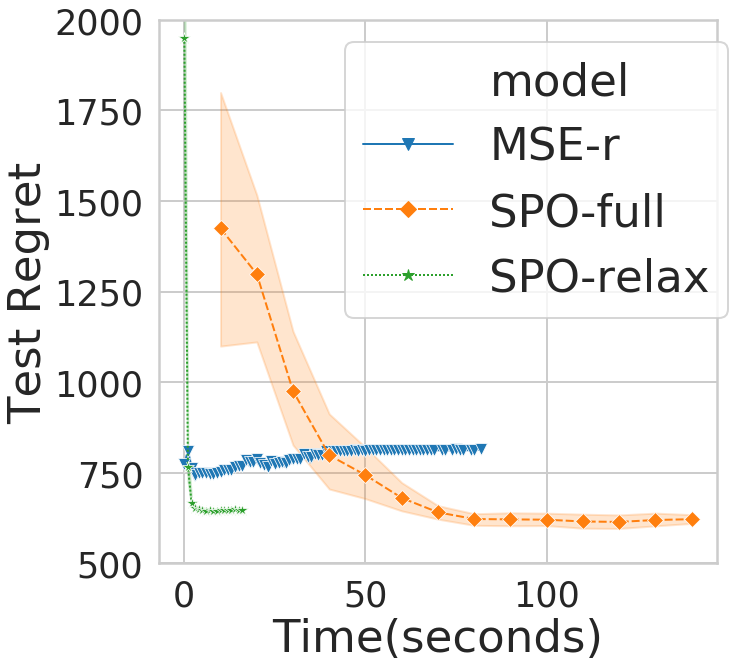

In [33]:

fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')
#df_weighted = df_weighted[df_weighted['subepoch']<20]
g= sns.lineplot(x='time', y='test_regret_full',
                    hue='model',style='model',ax=ax ,markers=["v","D","*"],
              data= df_weighted[(df_weighted['capacity']==60) &(df_weighted['time']<150)])
#ax.set_xscale('log')
#ax.set_yscale('log')
g.set(ylim=(500, 2000))
ax.set_xlabel('Time(seconds)',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
#ax1.set_title("Capacity:90",fontsize= 45,y=0.8,x=0.85)
ax.legend(loc="upper left",fontsize=45,bbox_to_anchor=[-0.1,1])
ax.tick_params(labelsize=35)
ax.legend(loc="upper right",fontsize=45,bbox_to_anchor=[1.06, 1])
plt.savefig('weighted_SPOvsSPOr_time.png',
           bbox_inches = 'tight')


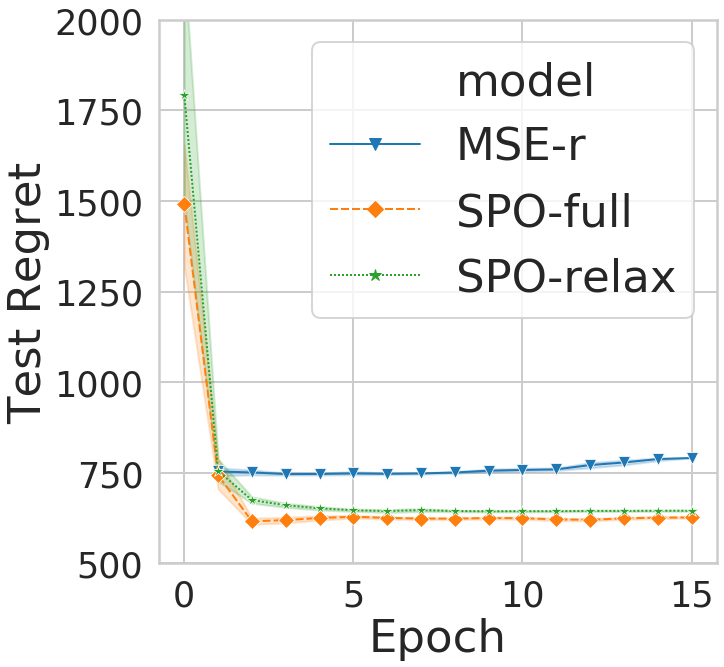

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')

g = sns.lineplot(x='subepoch', y='test_regret_full',
                   hue='model',style='model',ax=ax ,markers=["v","D","*"],
              data= df_weighted[(df_weighted['capacity']==60) &(df_weighted['subepoch']<16)])
#ax.set_yscale('log')
ax.set_xlabel('Epoch',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
#ax2.set_title("Capacity:90",fontsize= 45,y=0.8,x=0.4)
ax.legend(loc="upper right",fontsize=45)
ax.tick_params(labelsize= 35)
g.set(ylim=(500, 2000))
plt.savefig('weighted_SPOvsSPOr_epoch.png',
            bbox_inches = 'tight')

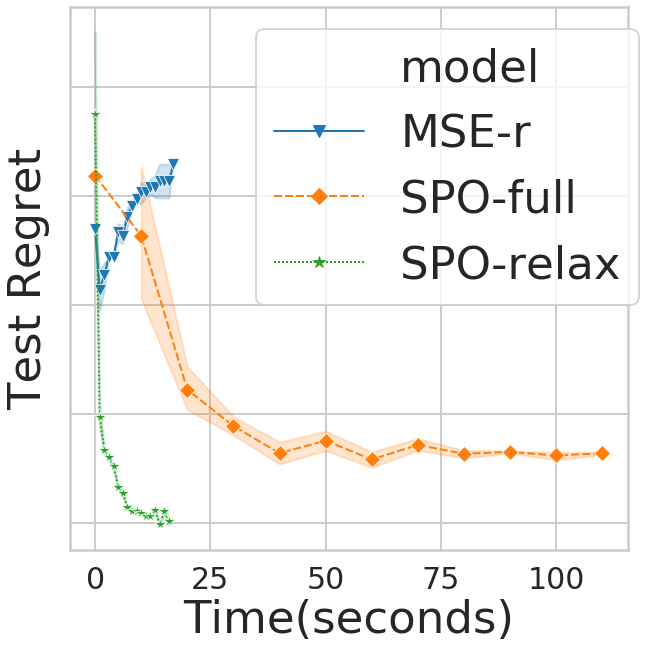

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')
df_unweighted = df_unweighted[df_unweighted['subepoch']<20]
df_unweighted = df_unweighted.sort_values('model')
ax.tick_params(left=False, bottom=False)
g1 = sns.lineplot(x='time', y='test_regret_full',
                    hue='model',style='model',ax=ax ,markers=["v","D","*"],
              data= df_unweighted[(df_unweighted['capacity']==10) &(df_unweighted['time']<120)])


ax.yaxis.set_major_formatter(plt.NullFormatter())
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Time(seconds)',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
#ax1.set_title("Capacity:10",fontsize= 45,y=0.8,x=0.85)
ax.legend(loc="upper right",fontsize=45,bbox_to_anchor=[1.06, 1])
ax.tick_params(which="both",labelsize=30)
plt.savefig('unweighted_SPOvsSPOr_time.png',
            bbox_inches = 'tight')

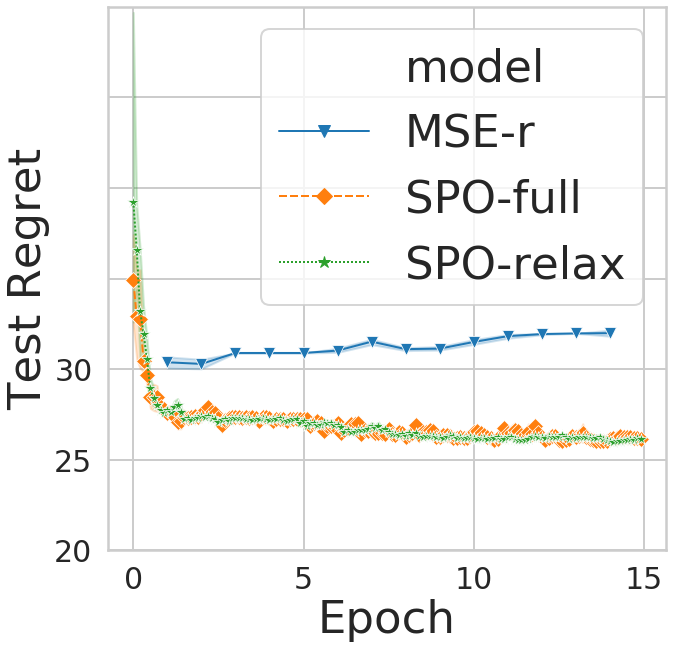

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')
df_unweighted = df_unweighted[df_unweighted['subepoch']<15]

ax.tick_params(left=False, bottom=False)
g2 = sns.lineplot(x='subepoch', y='test_regret_full',
                    hue='model',style='model',ax=ax ,markers=["v","D","*"],
              data= df_unweighted[(df_unweighted['capacity']==10) ])
g2.set(yticklabels=[20,25,30])
#ax.set_yscale('log')
ax.set_xlabel('Epoch',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
#ax2.set_title("Capacity:10",fontsize= 45,y=0.8,x=0.15)
ax.legend(loc="upper right",fontsize=45)
ax.tick_params(which="both",labelsize=30)
g2.set(ylim=(10, 40))
plt.savefig('unweighted_SPOvsSPOr_epoch.png',
            bbox_inches = 'tight')

In [6]:
qptl_weighted = pd.read_csv("../experiments/Results/weighted_QPTL.csv")
qptl_unweighted = pd.read_csv("../experiments/Results/Unweighted_QPTL.csv")
spo_weighted = pd.read_csv("../experiments/Results/weightedSPO_timelimit.csv")
spo_unweighted = pd.read_csv("../experiments/Results/UnweightedSPO_timelimit.csv")
unweighted_reg  = pd.read_csv("../experiments/Results/Unweighted_reg_timelimit.csv")
weighted_reg = pd.read_csv("../experiments/Results/weighted_reg_timelimit.csv")



In [38]:
spo_weighted = spo_weighted[ (spo_weighted['training_relaxation']==True)&(spo_weighted['validation_relaxation']==True)]
spo_unweighted = spo_unweighted[ (spo_unweighted['training_relaxation']==True)&(spo_unweighted['validation_relaxation']==True)]

qptl_weighted['model'] ="QPTL"
qptl_unweighted['model'] ="QPTL"
qptl_weighted ['subepoch'] = qptl_weighted ['subepoch']
qptl_unweighted ['subepoch'] = qptl_unweighted ['subepoch']

spo_unweighted['model'] ="SPO-relax"
spo_weighted['model'] = "SPO-relax"

unweighted_reg['model']="MSE-r"
weighted_reg['model']="MSE-r"

spo_weighted=spo_weighted.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_unweighted=spo_unweighted.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
weighted_reg = weighted_reg.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
unweighted_reg = unweighted_reg.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
df_weighted = pd.concat([spo_weighted,qptl_weighted])
df_unweighted = pd.concat([spo_unweighted,qptl_unweighted])

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [39]:
df_weighted = df_weighted.reset_index(drop=True)

df_weighted_best =  df_weighted.groupby(['capacity','model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_weighted_best = df_weighted_best.loc[df_weighted_best.groupby(['capacity','model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['capacity','model','subepoch','hyperparams']]
s = df_weighted_best[(df_weighted_best['capacity']==30)&(df_weighted_best['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

In [40]:
df_weighted = pd.concat([spo_weighted[spo_weighted['subepoch']>600],
                         qptl_weighted[qptl_weighted['subepoch']>600],weighted_reg])

df_weighted = df_weighted.reset_index(drop=True)

df_weighted_best =  df_weighted.groupby(['capacity','model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_weighted_best_hyperparams = df_weighted_best.loc[df_weighted_best.groupby(['capacity','model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['capacity','model','subepoch','hyperparams']]
df_weighted_best = df_weighted_best_hyperparams.merge(df_weighted,on=['capacity','model','subepoch','hyperparams'])

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [41]:
df_unweighted = pd.concat([spo_unweighted[spo_unweighted['subepoch']>600],
                          qptl_unweighted[qptl_unweighted['subepoch']>600],unweighted_reg  ])
df_unweighted = df_unweighted.reset_index(drop=True)

df_unweighted_best =  df_unweighted.groupby(['capacity','model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_unweighted_best_hyperparams = df_unweighted_best.loc[df_unweighted_best.groupby(['capacity','model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['capacity','model','subepoch','hyperparams']]
df_unweighted_best = df_unweighted_best_hyperparams.merge(df_unweighted,on=['capacity','model','subepoch','hyperparams'])


/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


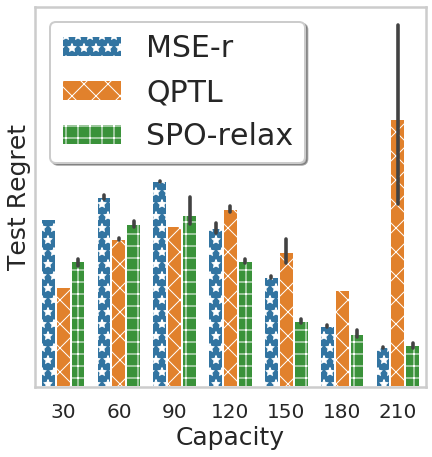

In [42]:


fig, ax = plt.subplots(1, 1, figsize=(7,7))
num_locations = len(df_weighted_best.capacity.unique())
hatches = itertools.cycle(['*', 'x', '+', '-', '.', '\\'])
beginning = itertools.islice(hatches, 0, None)
f2 = sns.barplot(x="capacity", y="test_regret",hue="model" ,data= df_weighted_best,ax=ax )
for i, bar in enumerate(f2.patches):
    if i % num_locations == 0:
        hatch = next(beginning)
    bar.set_hatch(hatch)

f2.legend( fancybox=True, shadow=True,fontsize =30)
ax.set_xlabel("Capacity",fontsize= 25)
ax.set_ylabel("Test Regret",fontsize= 25)
ax.tick_params(labelsize=20)
ax.set_yticks([])
#f1.set(ylim=(0, 100))

plt.savefig('SPOvsQPTL_wk.png',
           bbox_inches = 'tight')

In [43]:
 df_unweighted_best_hyperparams[(df_unweighted_best_hyperparams['capacity']==40)&
(df_unweighted_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

"{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.0001, 'tau': 20000}"

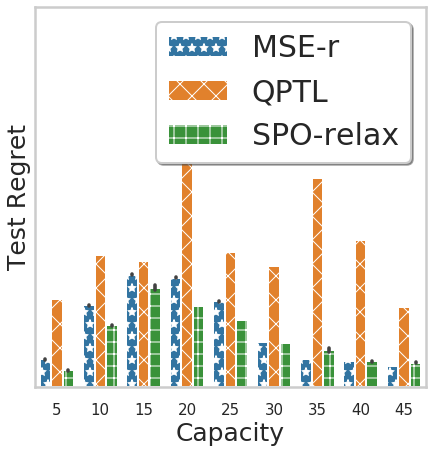

In [44]:

fig, ax = plt.subplots(1, 1, figsize=(7,7))
num_locations = len(df_unweighted_best.capacity.unique())
hatches = itertools.cycle(['*', 'x', '+', '-', '.', '\\'])
beginning = itertools.islice(hatches, 0, None)
f3 = sns.barplot(x="capacity", y="test_regret",hue="model" ,data= df_unweighted_best,ax=ax )
for i, bar in enumerate(f3.patches):
    if i % num_locations == 0:
        hatch = next(beginning)
    bar.set_hatch(hatch)

f3.legend( fancybox=True, shadow=True,fontsize =30)
ax.set_xlabel("Capacity",fontsize= 25)
ax.set_ylabel("Test Regret",fontsize= 25)
ax.tick_params(labelsize=15)
ax.set_yticks([])
f3.set(ylim=(0, 100))

plt.savefig('SPOvsQPTL_uk.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


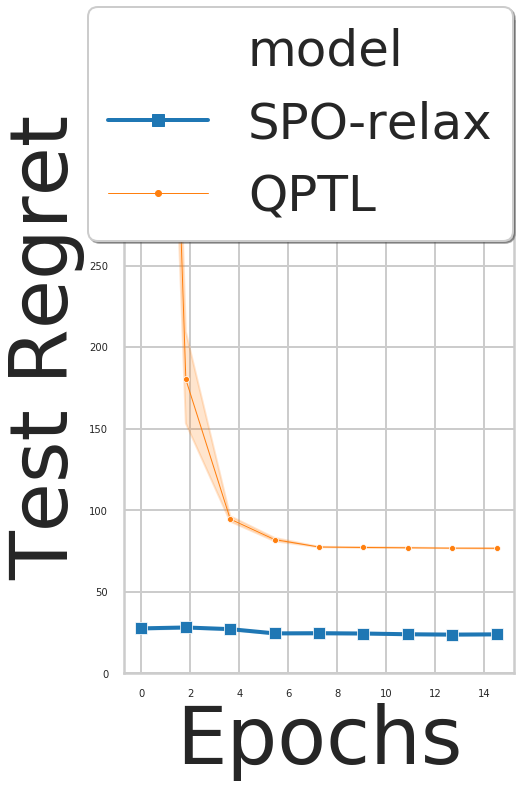

In [51]:
capa = 20
spo_hyperparams = df_unweighted_best_hyperparams[(df_unweighted_best_hyperparams['capacity']==capa)&
(df_unweighted_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_unweighted_best_hyperparams[(df_unweighted_best_hyperparams['capacity']==capa)&
(df_unweighted_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

df_unweighted = pd.concat([spo_unweighted[spo_unweighted['hyperparams'].isin([spo_hyperparams])],
                         qptl_unweighted[qptl_unweighted['hyperparams']== qptl_hyperparams] ])
df_unweighted.subepoch = df_unweighted.subepoch.round(decimals=-3)
df_unweighted.subepoch = df_unweighted.subepoch/552
df_unweighted = df_unweighted[df_unweighted['subepoch']<15]
fig, ax = plt.subplots(1, 1, figsize=(7,12))
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})
g = sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
                 data=df_unweighted[df_unweighted['capacity']==capa],ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(axis="y",labelsize=10)
ax.tick_params(axis="x",labelsize=10)
g.set(ylim=(0, 400))

plt.savefig('SPOvsQPTL_lc_uk_20.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


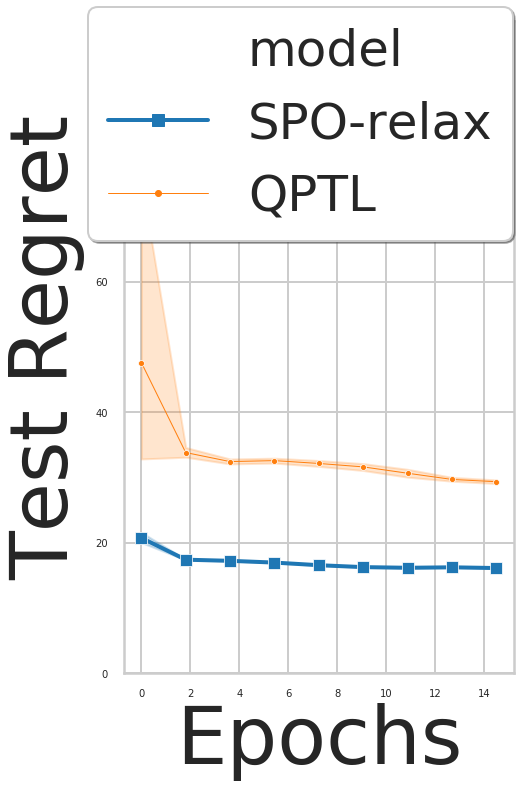

In [50]:
capa = 10
spo_hyperparams = df_unweighted_best_hyperparams[(df_unweighted_best_hyperparams['capacity']==capa)&
(df_unweighted_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_unweighted_best_hyperparams[(df_unweighted_best_hyperparams['capacity']==capa)&
(df_unweighted_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

df_unweighted = pd.concat([spo_unweighted[spo_unweighted['hyperparams'].isin([spo_hyperparams])],
                         qptl_unweighted[qptl_unweighted['hyperparams']== qptl_hyperparams] ])
df_unweighted.subepoch = df_unweighted.subepoch.round(decimals=-3)
df_unweighted.subepoch = df_unweighted.subepoch/552
df_unweighted = df_unweighted[df_unweighted['subepoch']<15]
fig, ax = plt.subplots(1, 1, figsize=(7,12))
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})
g = sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
                 data=df_unweighted[df_unweighted['capacity']==capa],ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(axis="y",labelsize=10)
ax.tick_params(axis="x",labelsize=10)
g.set(ylim=(0, 100))

plt.savefig('SPOvsQPTL_lc_uk_10.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


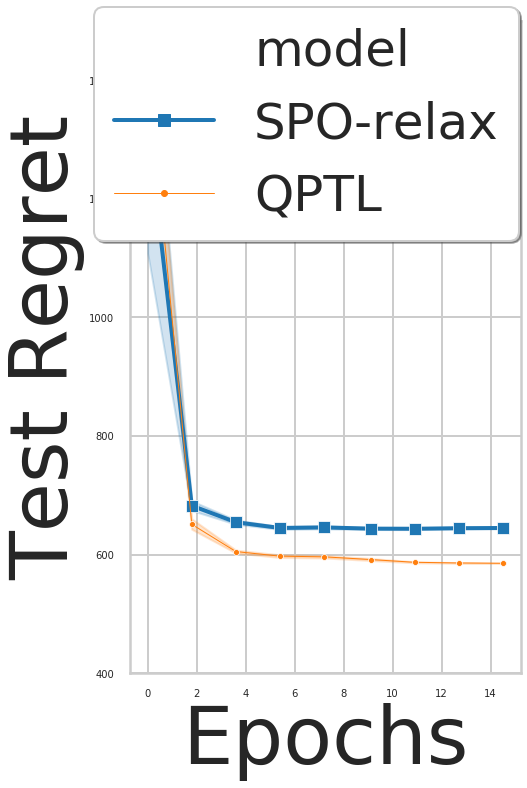

In [49]:
capa = 60

spo_hyperparams = df_weighted_best_hyperparams[(df_weighted_best_hyperparams['capacity']==capa)&
(df_weighted_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_weighted_best_hyperparams[(df_weighted_best_hyperparams['capacity']==capa)&
(df_weighted_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

df_weighted = pd.concat([spo_weighted[spo_weighted['hyperparams']==spo_hyperparams],
                         qptl_weighted[qptl_weighted['hyperparams']== qptl_hyperparams] ])
df_weighted.subepoch = df_weighted.subepoch.round(decimals=-3)
df_weighted.subepoch = df_weighted.subepoch/552
df_weighted = df_weighted[df_weighted['subepoch']<15]
df_weighted.subepoch = df_weighted.subepoch.round(decimals=1)
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})
fig, ax = plt.subplots(1, 1, figsize=(7,12))
g = sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
                 data=df_weighted[df_weighted['capacity']==capa],ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(axis="y",labelsize=10)
ax.tick_params(axis="x",labelsize=10)
g.set(ylim=(0, 400))
g.set(ylim=(400, 1500))
plt.savefig('SPOvsQPTL_lc_wk_60.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


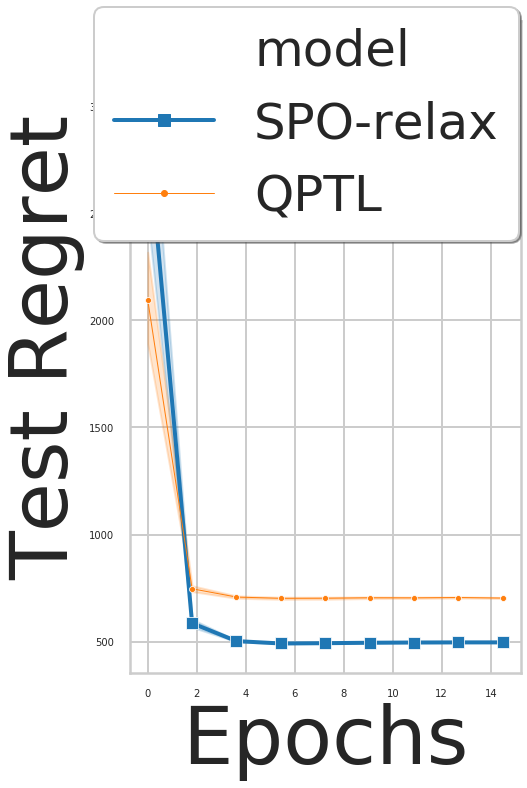

In [48]:
capa = 120

spo_hyperparams = df_weighted_best_hyperparams[(df_weighted_best_hyperparams['capacity']==capa)&
(df_weighted_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_weighted_best_hyperparams[(df_weighted_best_hyperparams['capacity']==capa)&
(df_weighted_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]

df_weighted = pd.concat([spo_weighted[spo_weighted['hyperparams']==spo_hyperparams],
                         qptl_weighted[qptl_weighted['hyperparams']== qptl_hyperparams] ])
df_weighted.subepoch = df_weighted.subepoch.round(decimals=-3)
df_weighted.subepoch = df_weighted.subepoch/552
df_weighted = df_weighted[df_weighted['subepoch']<15]
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})
fig, ax = plt.subplots(1, 1, figsize=(7,12))
g = sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
                 data=df_weighted[df_weighted['capacity']==capa],ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(axis="y",labelsize=10)
ax.tick_params(axis="x",labelsize=10)

plt.savefig('SPOvsQPTL_lc_wk_120.png',
           bbox_inches = 'tight')

In [45]:
spo_l1 =  pd.read_csv("../experiments/Results/Load1_SPO_timelimit.csv")
qptl_l1 = pd.read_csv("../experiments/Results/Load1_qptl.csv")
reg_l1 = pd.read_csv("../experiments/Results/Load1_reg_timelimit.csv")
print(spo_l1.training_relaxation.unique())
reg_l1['model'] = "MSE-r"
reg_l1=reg_l1.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })


spo_l1=spo_l1.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l2 =  pd.read_csv("../experiments/Results/Load2_SPO_timelimit.csv")
qptl_l2 = pd.read_csv("../experiments/Results/Load2_qptl.csv")
reg_l2 = pd.read_csv("../experiments/Results/Load2_reg_timelimit.csv")
print(spo_l2.training_relaxation.unique())
reg_l2['model'] = "MSE-r"
reg_l2=reg_l2.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l2=spo_l2.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l6 =  pd.read_csv("../experiments/Results/Load6_SPO_timelimit.csv")
qptl_l6 = pd.read_csv("../experiments/Results/Load6_qptl.csv")
reg_l6 = pd.read_csv("../experiments/Results/Load6_reg_timelimit.csv")

reg_l6['model'] = "MSE-r"
reg_l6=reg_l6.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l6=spo_l6.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })


[False  True]
[False  True]


In [46]:
spo_l1['relaxation'] =  spo_l1["training_relaxation"].map(str) + spo_l1["validation_relaxation"].map(str)
spo_l2['relaxation'] =  spo_l2["training_relaxation"].map(str) + spo_l2["validation_relaxation"].map(str)
spo_l6['relaxation'] =  spo_l6["training_relaxation"].map(str) + spo_l6["validation_relaxation"].map(str)
spo_l1['model']= spo_l1.apply(lambda row: "SPO-relax" if row.relaxation=="TrueTrue" else "SPO-full" if row.relaxation=="FalseFalse" else None, axis=1)
spo_l2['model']= spo_l2.apply(lambda row: "SPO-relax" if row.relaxation=="TrueTrue" else "SPO-full" if row.relaxation=="FalseFalse" else None, axis=1)
spo_l6['model']= spo_l6.apply(lambda row: "SPO-relax" if row.relaxation=="TrueTrue" else "SPO-full" if row.relaxation=="FalseFalse" else None, axis=1)

spo_l1.subepoch = spo_l1.subepoch/552
spo_l2.subepoch = spo_l2.subepoch/552
spo_l6.subepoch = spo_l6.subepoch/552

In [47]:
df_l2 = pd.concat([spo_l2[spo_l2.relaxation.isin(['FalseFalse','TrueTrue'])] ,reg_l2])
df_l2.time = df_l2.time.round(decimals=-1)

df_l2 = df_l2.sort_values(['model'], ascending=[True])

df_l1 = pd.concat([spo_l1[spo_l1.relaxation.isin(['FalseFalse','TrueTrue'])] ,reg_l1])
df_l1.time = df_l1.time.round(decimals=-1)
df_l1.time = df_l1.apply(lambda row: round(row.time,-2) if (row.model =="SPO-full") else round(row.time,-1),
                               axis=1)


df_l1 = df_l1.sort_values(['model'], ascending=[True])

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


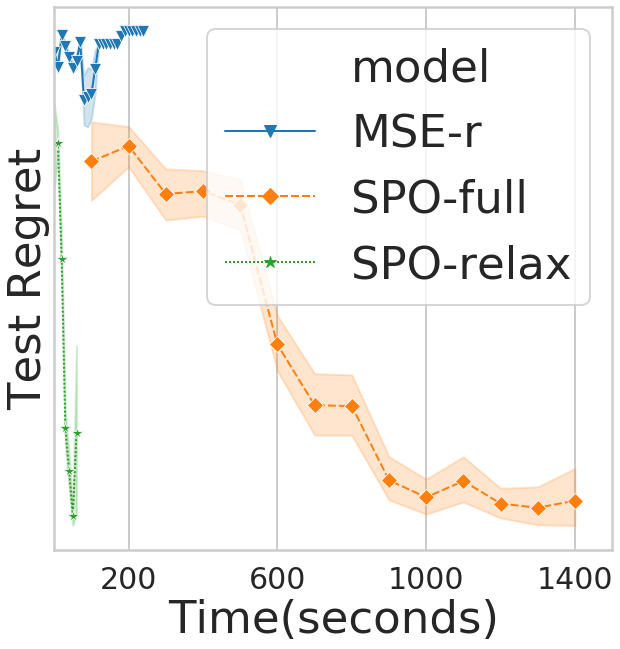

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')

g1 = sns.lineplot(x='time', y='test_regret',
                   hue='model',style='model',markers=["v","D","*"],
              data= df_l1[df_l1['time']<1500],ax=ax)
g1.set_yticks([2e+4])
ax.set_xticks(ax.get_xticks()[::2])
#g1.set(xticklabels=[i for i in range(0,1600,200)])
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0,1500)
ax.set_xlabel('Time(seconds)',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
ax.legend(loc="upper right",fontsize=45)
ax.tick_params(which="both",labelsize=30)
plt.savefig('ICON_SPOvsSPOr_time.png',
            bbox_inches = 'tight')

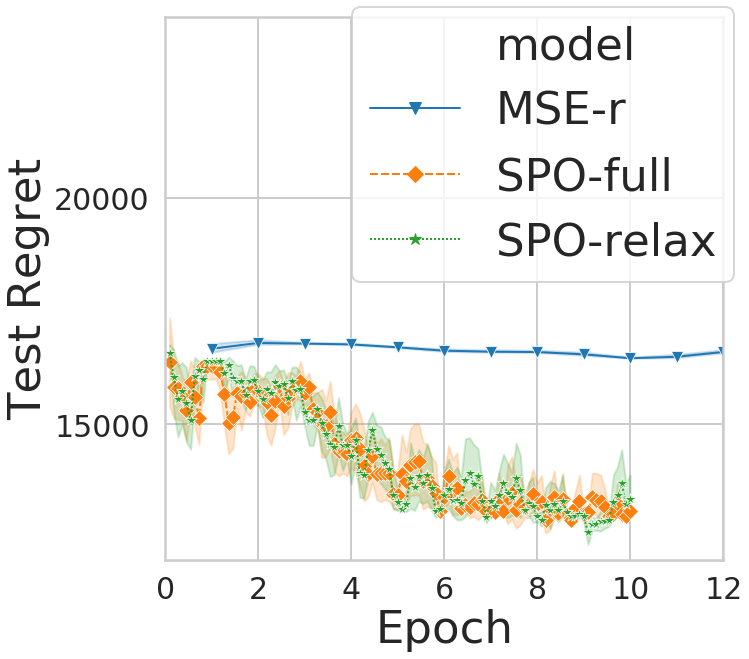

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('')

g2 = sns.lineplot(x='subepoch', y='test_regret',
                    hue='model',style='model',markers=["v","D","*"],
              data= df_l1,ax=ax)

#ax2.set_yscale('log')
ax.set_xlabel('Epoch',fontsize= 45)
ax.set_ylabel('Test Regret',fontsize= 45)
ax.set_xlim(0,12)
ax.set_ylim(12000,24000)
ax.legend(fontsize=45,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.tick_params(which="both",labelsize= 30)
ax.locator_params(nbins=2, axis='y')

plt.savefig('ICON_SPOvsSPOr_epoch.png',
            bbox_inches = 'tight')

In [7]:
spo_l1 =  pd.read_csv("../experiments/Results/Load1_SPO_warmstart_corrected.csv")
qptl_l1 = pd.read_csv("../experiments/Results/Load1_qptl.csv")
reg_l1 = pd.read_csv("../experiments/Results/Load1_reg_timelimit.csv")
spo_l1 = spo_l1[ (spo_l1['training_relaxation']==True)&(spo_l1['validation_relaxation']==True)]
qptl_l1['model'] ="QPTL"
reg_l1['model'] = "MSE-r"
reg_l1=reg_l1.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })

spo_l1['model'] ="SPO-relax"
spo_l1=spo_l1.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l2 =  pd.read_csv("../experiments/Results/Load2_SPO_warmstart_corrected.csv")
qptl_l2 = pd.read_csv("../experiments/Results/Load2_qptl.csv")
spo_l2 = spo_l2[ (spo_l2['training_relaxation']==True)&(spo_l2['validation_relaxation']==True)]
reg_l2 = pd.read_csv("../experiments/Results/Load2_reg_timelimit.csv")
qptl_l2['model'] ="QPTL"

spo_l2['model'] ="SPO-relax"
reg_l2['model'] = "MSE-r"
reg_l2=reg_l2.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l2=spo_l2.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l6 =  pd.read_csv("../experiments/Results/Load6_SPO_warmstart_corrected.csv")
qptl_l6 = pd.read_csv("../experiments/Results/Load6_qptl.csv")
spo_l6 = spo_l6[ (spo_l6['training_relaxation']==True)&(spo_l6['validation_relaxation']==True)]
reg_l6 = pd.read_csv("../experiments/Results/Load6_reg_timelimit.csv")
qptl_l6['model'] ="QPTL"

spo_l6['model'] ="SPO-relax"
reg_l6['model'] = "MSE-r"
reg_l6=reg_l6.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l6=spo_l6.rename(columns = {'validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_l1 = spo_l1[(spo_l1['reset']==True)&(spo_l1['presolve']==True)&(spo_l1['warmstart']==False)]
spo_l2 = spo_l2[(spo_l2['reset']==True)&(spo_l2['presolve']==True)&(spo_l2['warmstart']==False)]
spo_l6 = spo_l6[(spo_l6['reset']==True)&(spo_l6['presolve']==True)&(spo_l6['warmstart']==False)]

In [53]:
qptl_l1.hyperparams.unique()

array(["{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'betas': (0.98, 0.999)}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'tau': 100000.0}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'betas': (0.95, 0.8)}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.001}"],
      dtype=object)

In [54]:
qptl_l2.hyperparams.unique()

array(["{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'betas': (0.98, 0.999)}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'tau': 100000.0}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.001, 'betas': (0.95, 0.8)}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01}",
       "{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.001}"],
      dtype=object)

In [51]:
df_l2 = pd.concat([spo_l2[spo_l2['subepoch']>550],qptl_l2[qptl_l2['subepoch']>550],reg_l2])



df_l2  = df_l2.reset_index(drop=True)

df_l2_best =  df_l2.groupby(['model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_l2_best_hyperparams = df_l2_best.loc[df_l2_best.groupby(['model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['model','subepoch','hyperparams']]
df_l2_best = df_l2_best_hyperparams.merge(df_l2,on=['model','subepoch','hyperparams'])

df_l1 = pd.concat([spo_l1[spo_l1['subepoch']>550],qptl_l1[qptl_l1['subepoch']>550],reg_l1])

df_l1  = df_l1.reset_index(drop=True)

df_l1_best =  df_l1.groupby(['model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_l1_best_hyperparams = df_l1_best.loc[df_l1_best.groupby(['model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['model','subepoch','hyperparams']]
df_l1_best = df_l1_best_hyperparams.merge(df_l1,on=['model','subepoch','hyperparams'])

df_l6 = pd.concat([spo_l6[spo_l6['subepoch']>550],
                   qptl_l6[(qptl_l6['subepoch']>550)&(qptl_l6['subepoch']<3000)],reg_l6])
df_l6  = df_l6.reset_index(drop=True)

df_l6_best =  df_l6.groupby(['model','subepoch','hyperparams'],as_index=False)['validation_regret'].mean()
df_l6_best_hyperparams = df_l6_best.loc[df_l6_best.groupby(['model'],
                                              as_index=False)['validation_regret'].idxmin(),
                     ['model','subepoch','hyperparams']]
df_l6_best = df_l6_best_hyperparams.merge(df_l6,on=['model','subepoch','hyperparams'])

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=Fal

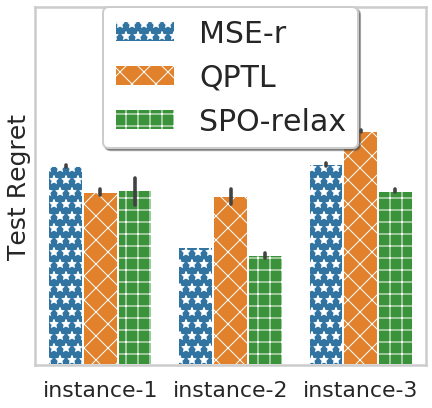

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7,6.6))
 
df_l1_best['Schedule'] = "instance-1"
df_l2_best['Schedule'] = "instance-2"
df_l6_best['Schedule'] = "instance-3"

df_best = pd.concat([df_l1_best,df_l2_best,df_l6_best])

num_locations = len(df_best.Schedule.unique())
hatches = itertools.cycle(['*', 'x', '+', '-', '.', '\\'])
beginning = itertools.islice(hatches, 0, None)
f1 = sns.barplot(x="Schedule", y="test_regret",hue="model" ,data= df_best,ax=ax )
for i, bar in enumerate(f1.patches):
    if i % num_locations == 0:
        hatch = next(beginning)
    bar.set_hatch(hatch)

f1.legend( fancybox=True, shadow=True,fontsize =30,loc="upper center",bbox_to_anchor=[0.5,1.04])

ax.set_ylabel("Test Regret",fontsize= 25)
ax.tick_params(labelsize=10,axis="y")
ax.set_xlabel('') 
ax.set_ylim(0,30000)
ax.tick_params(axis="y",labelsize=8)
#ax.set_yticklabels([i for i in range(10000,31000,20000)])
ax.set_yticks([])
plt.savefig('SPOvsQPTL_ICON.png',
           bbox_inches = 'tight')


/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


[(5000, 30000)]

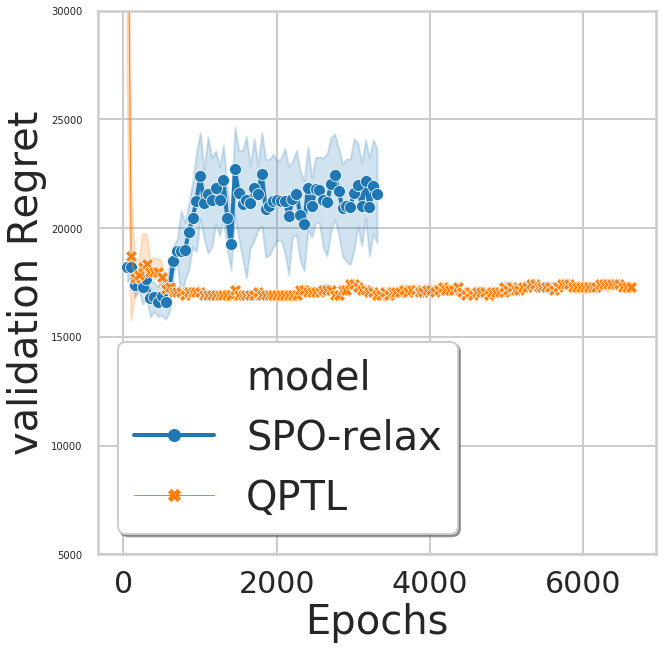

In [45]:
spo_hyperparams = df_l1_best_hyperparams[(df_l1_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l1_best_hyperparams[(df_l1_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l1 = pd.concat([spo_l1[spo_l1["hyperparams"]==spo_hyperparams],
                   qptl_l1[qptl_l1["hyperparams"]==qptl_hyperparams]])
                   
fig, ax = plt.subplots(1, 1, figsize=(10,10))
df_l1.subepoch = df_l1.subepoch
g= sns.lineplot(x='subepoch', y='validation_regret',markers=True, dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l1,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =40)
ax.set_xlabel("Epochs",fontsize= 40)
ax.set_ylabel("validation Regret",fontsize= 40)
ax.tick_params(labelsize=10)
ax.tick_params(axis="x",labelsize=30)
g.set(ylim=(5000, 30000))



/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


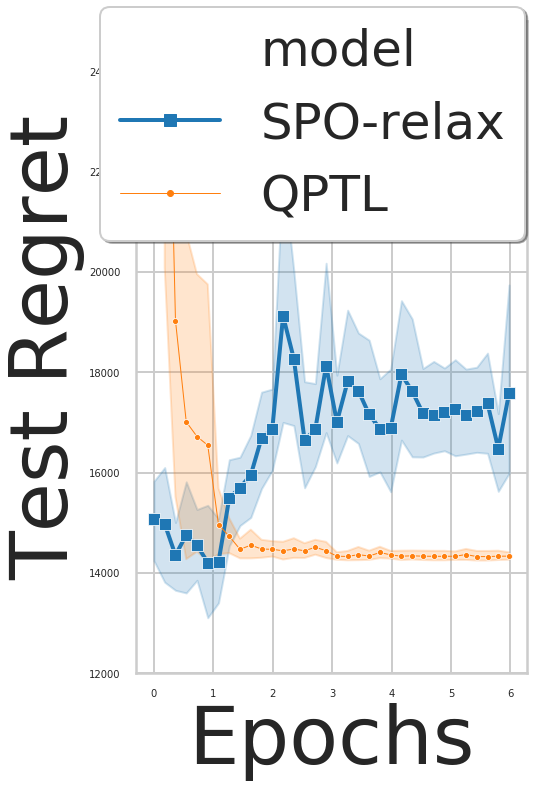

In [68]:
spo_hyperparams = df_l1_best_hyperparams[(df_l1_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l1_best_hyperparams[(df_l1_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l1 = pd.concat([spo_l1[spo_l1["hyperparams"]==spo_hyperparams],
                   qptl_l1[qptl_l1["hyperparams"]==qptl_hyperparams]])
                   
fig, ax = plt.subplots(1, 1, figsize=(7,12))
df_l1.subepoch = df_l1.subepoch.round(decimals=-2)
df_l1.subepoch = df_l1.subepoch/552
df_l1 = df_l1[df_l1['subepoch']<6]
g= sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l1,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(labelsize=10)
ax.tick_params(axis="x",labelsize=10)
g.set(ylim=(12000, 25000))

plt.savefig('SPOvsQPTL_lc_l1.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


[(9000, 25000)]

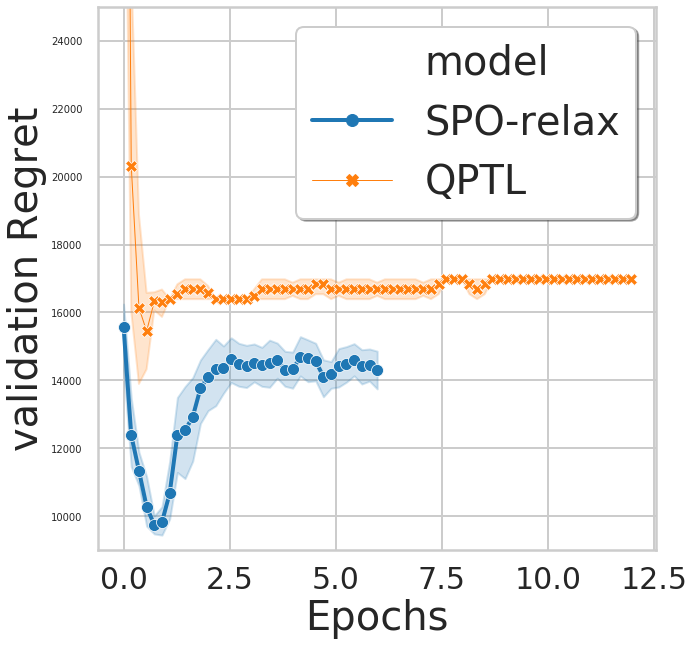

In [61]:
spo_hyperparams = df_l2_best_hyperparams[(df_l2_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l2_best_hyperparams[(df_l2_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l2 = pd.concat([spo_l2[spo_l2["hyperparams"]==spo_hyperparams],
                   qptl_l2[qptl_l2["hyperparams"]==qptl_hyperparams]])
df_l2.subepoch = df_l2.subepoch.round(decimals=-2)
df_l2.subepoch = df_l2.subepoch/552
df_l2 = df_l2[df_l2['subepoch']<15]
fig, ax = plt.subplots(1, 1, figsize=(10,10))
g= sns.lineplot(x='subepoch', y='validation_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l2,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =40)
ax.set_xlabel("Epochs",fontsize= 40)
ax.set_ylabel("validation Regret",fontsize= 40)
ax.tick_params(labelsize=10,axis="y")
ax.tick_params(axis="x",labelsize=30)
#ax.set_xticklabels([i for i in range(1,12,2)])
g.set(ylim=(9000, 25000))

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


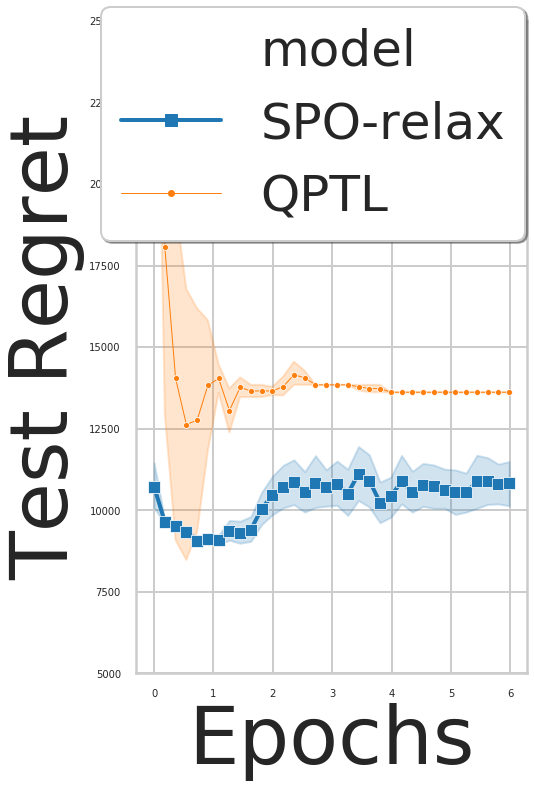

In [63]:
spo_hyperparams = df_l2_best_hyperparams[(df_l2_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l2_best_hyperparams[(df_l2_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l2 = pd.concat([spo_l2[spo_l2["hyperparams"]==spo_hyperparams],
                   qptl_l2[qptl_l2["hyperparams"]==qptl_hyperparams]])
df_l2.subepoch = df_l2.subepoch.round(decimals=-2)
df_l2.subepoch = df_l2.subepoch/552
df_l2 = df_l2[df_l2['subepoch']<6]
fig, ax = plt.subplots(1, 1, figsize=(7,12))
g= sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l2,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(labelsize=10)
ax.tick_params(axis="x",labelsize=10)
g.set(ylim=(5000, 25000))


plt.savefig('SPOvsQPTL_lc_l2.png',
           bbox_inches = 'tight')

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


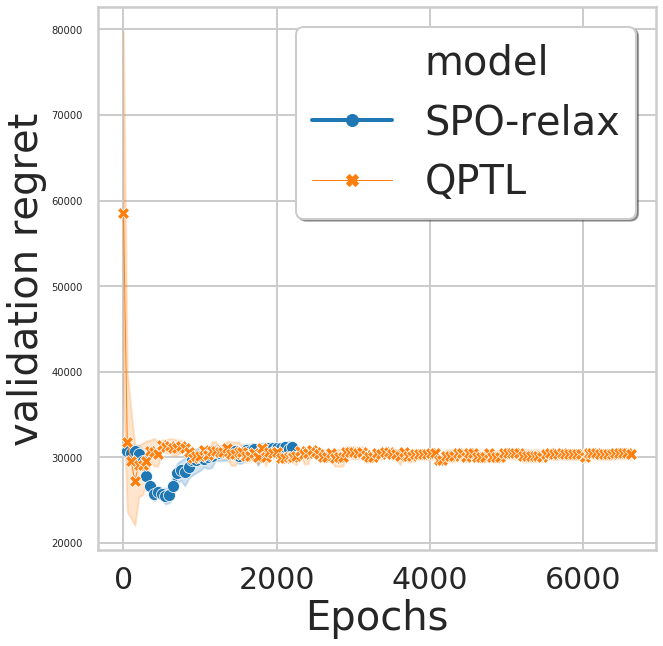

In [256]:
spo_hyperparams = df_l6_best_hyperparams[(df_l6_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l6_best_hyperparams[(df_l6_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l6 = pd.concat([spo_l6[spo_l6["hyperparams"]==spo_hyperparams],
                   qptl_l6[qptl_l6["hyperparams"]==qptl_hyperparams]])
df_l6.subepoch = df_l6.subepoch#/552
fig, ax = plt.subplots(1, 1, figsize=(10,10))
g= sns.lineplot(x='subepoch', y='validation_regret',markers=True, dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l6,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =40)
ax.set_xlabel("Epochs",fontsize= 40)
ax.set_ylabel("validation regret",fontsize= 40)
ax.tick_params(labelsize=10,axis="y")
ax.tick_params(axis="x",labelsize=30)

In [257]:
qptl_hyperparams

"{'optimizer': <class 'torch.optim.adam.Adam'>, 'lr': 0.01, 'betas': (0.9, 0.6)}"

/home/jayanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


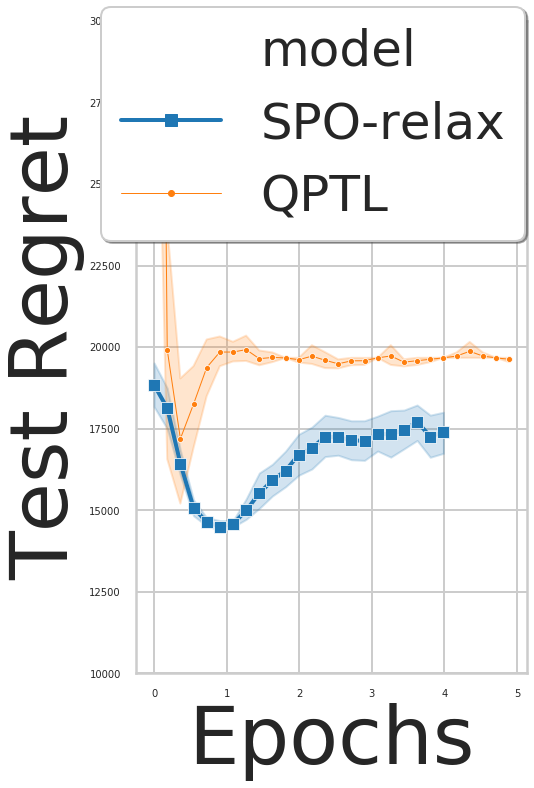

In [67]:
spo_hyperparams = df_l6_best_hyperparams[(df_l6_best_hyperparams['model']=="SPO-relax")]['hyperparams'].reset_index(drop=True)[0]
qptl_hyperparams = df_l6_best_hyperparams[(df_l6_best_hyperparams['model']=="QPTL")]['hyperparams'].reset_index(drop=True)[0]


df_l6 = pd.concat([spo_l6[spo_l6["hyperparams"]==spo_hyperparams],
                   qptl_l6[qptl_l6["hyperparams"]==qptl_hyperparams]])
df_l6.subepoch =  df_l6.subepoch.round(decimals=-2)
df_l6.subepoch = df_l6.subepoch/552
df_l6 = df_l6[df_l6['subepoch']<5]
fig, ax = plt.subplots(1, 1, figsize=(7,12))
g= sns.lineplot(x='subepoch', y='test_regret',markers=['s','.'], dashes=False,
                  legend="full", style="model",hue="model",size="model", 
             data=df_l6,ax=ax)
g.legend( fancybox=True, shadow=True,fontsize =50,loc="upper right",bbox_to_anchor=[1.06, 1.06])
ax.set_xlabel("Epochs",fontsize= 80)
ax.set_ylabel("Test Regret",fontsize= 80)
ax.tick_params(labelsize=10)
ax.tick_params(axis="x",labelsize=10)
#ax.set_xticklabels([i for i in range(1,12,2)])
g.set(ylim=(10000, 30000))


plt.savefig('SPOvsQPTL_lc_l6.png',
           bbox_inches = 'tight')